In [1]:
import pandas as pd

In [2]:
file = 'US_Accidents_cleaned.csv'
df = pd.read_csv(file)

In [3]:

from sklearn.model_selection import train_test_split

In [6]:


# 1. Création de la colonne de stratification combinée
df['strata'] = (df['Severity'].astype(str) + '_' + 
                df['City'].astype(str) + '_' + 
                df['Weather_Condition'].astype(str))

# 2. Identification et filtrage des classes uniques
# On compte les occurrences de chaque combinaison
strata_counts = df['strata'].value_counts()

# On ne garde que les combinaisons qui apparaissent au moins 2 fois
df_filtered = df[df['strata'].isin(strata_counts[strata_counts >= 2].index)].copy()

print(f"Lignes supprimées car uniques (ex: {df['strata'].iloc[0]}) : {len(df) - len(df_filtered)}")

# 3. Échantillonnage stratifié sur le dataset filtré
sample_fraction = 0.1

# Utilisation de train_size=0.1 pour récupérer directement les 10% demandés
sample_df, _ = train_test_split(
    df_filtered,
    train_size=sample_fraction,
    stratify=df_filtered['strata'],
    random_state=42
)

# 4. Vérification
print(f"Taille de l'échantillon final : {len(sample_df)} lignes")
print("\nVérification des premières lignes de l'échantillon :")
print(sample_df[['Severity', 'City', 'Weather_Condition']].head())


Lignes supprimées car uniques (ex: 3_Dayton_Light Rain) : 73963
Taille de l'échantillon final : 765443 lignes

Vérification des premières lignes de l'échantillon :
         Severity          City Weather_Condition
3464332         2       Lebanon             Clear
5389199         2  Grand Rapids              Fair
472088          3     La Grange     Mostly Cloudy
6996718         3        Dallas            Cloudy
3892125         2        Dallas     Mostly Cloudy


C:\Users\imane\AppData\Local\Temp\ipykernel_7064\1603503989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='low_visibility', y='Severity', data=sample_df, palette='coolwarm')


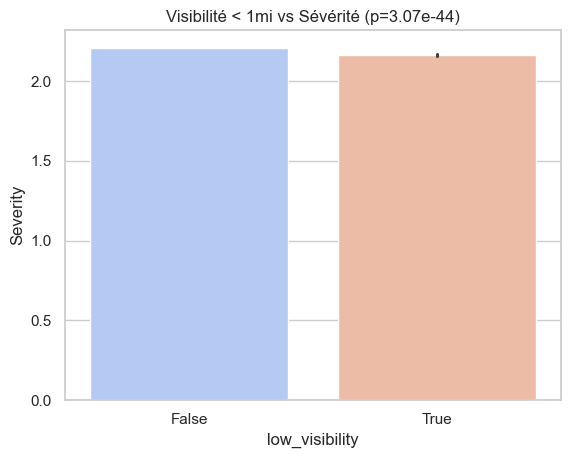

In [11]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrage : On compare visibilité < 1 mile vs visibilité >= 1 mile
sample_df['low_visibility'] = sample_df['Visibility(mi)'] < 1

# Mécanisme : Test du Chi-2 d'indépendance
contingency = pd.crosstab(sample_df['low_visibility'], sample_df['Severity'])
chi2, p, _, _ = stats.chi2_contingency(contingency)

# Visualisation
sns.barplot(x='low_visibility', y='Severity', data=sample_df, palette='coolwarm')
plt.title(f"Visibilité < 1mi vs Sévérité (p={p:.2e})")
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\3863905402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Condition', y='Distance(mi)', data=df_comp, palette='magma', capsize=.1)


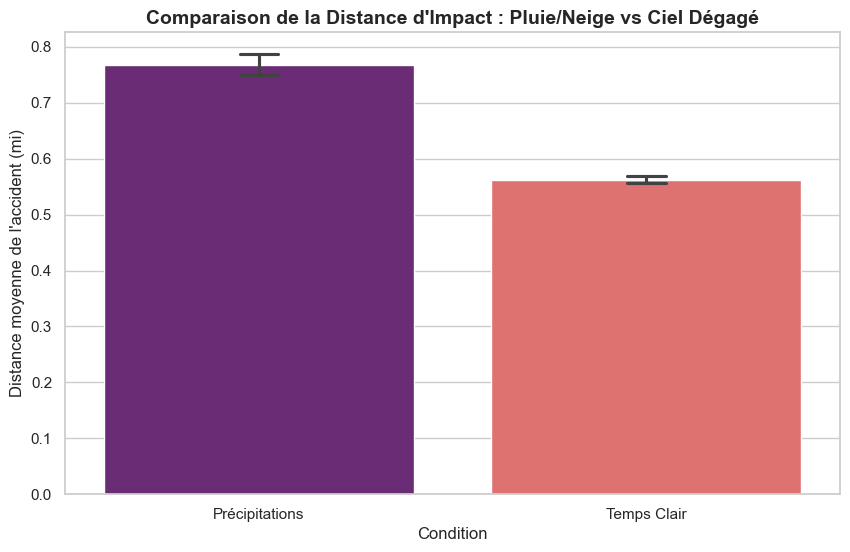

In [13]:
# Filtrage des données pour comparer Pluie vs Temps Clair
rain_data = sample_df[sample_df['Weather_Condition'].str.contains('Rain|Snow', na=False, case=False)].copy()
rain_data['Condition'] = 'Précipitations'
clear_data = sample_df[sample_df['Weather_Condition'].str.contains('Clear|Fair', na=False, case=False)].copy()
clear_data['Condition'] = 'Temps Clair'
df_comp = pd.concat([rain_data, clear_data])

plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='Distance(mi)', data=df_comp, palette='magma', capsize=.1)
plt.title("Comparaison de la Distance d'Impact : Pluie/Neige vs Ciel Dégagé", fontsize=14, fontweight='bold')
plt.ylabel("Distance moyenne de l'accident (mi)")
plt.show()

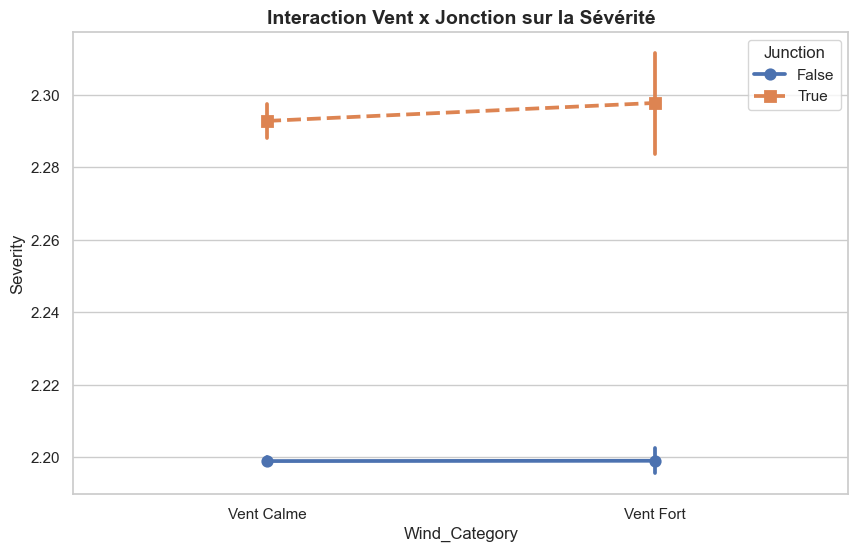

In [15]:
import numpy as np
# On binarise le vent (Calme < 15mph vs Fort >= 15mph)
sample_df['Wind_Category'] = np.where(sample_df['Wind_Speed(mph)'] >= 15, 'Vent Fort', 'Vent Calme')

plt.figure(figsize=(10, 6))
sns.pointplot(x='Wind_Category', y='Severity', hue='Junction', data=sample_df, markers=["o", "s"], linestyles=["-", "--"])
plt.title("Interaction Vent x Jonction sur la Sévérité", fontsize=14, fontweight='bold')
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\711419882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Temp_Bins', y='Severity', data=sample_df, palette='Blues_r')


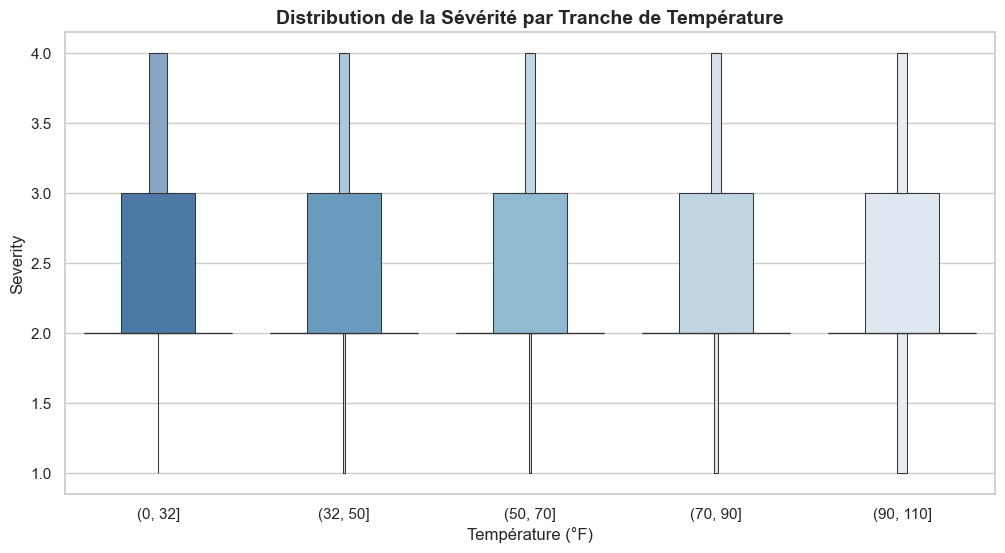

In [16]:
plt.figure(figsize=(12, 6))
# Création de tranches de température pour une meilleure visibilité
sample_df['Temp_Bins'] = pd.cut(sample_df['Temperature(F)'], bins=[0, 32, 50, 70, 90, 110])
sns.boxenplot(x='Temp_Bins', y='Severity', data=sample_df, palette='Blues_r')
plt.title("Distribution de la Sévérité par Tranche de Température", fontsize=14, fontweight='bold')
plt.xlabel("Température (°F)")
plt.show()

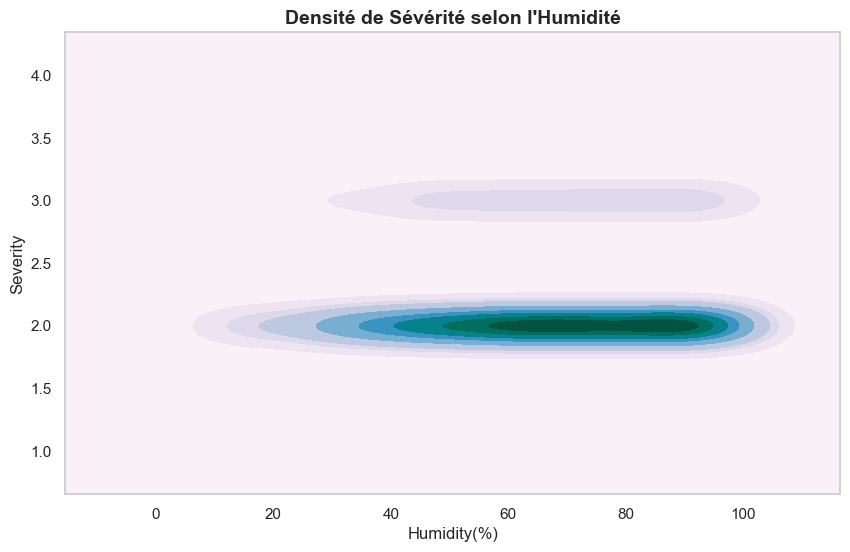

In [17]:
plt.figure(figsize=(10, 6))
# Jointplot pour voir la densité de points et la tendance
sns.kdeplot(x='Humidity(%)', y='Severity', data=sample_df.sample(5000), fill=True, cmap='PuBuGn', thresh=0, levels=10)
plt.title("Densité de Sévérité selon l'Humidité", fontsize=14, fontweight='bold')
plt.show()

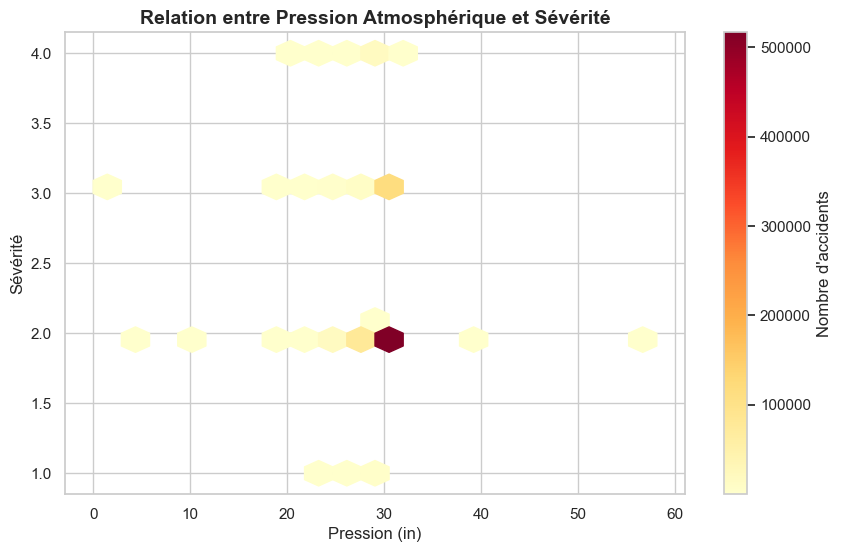

In [18]:
plt.figure(figsize=(10, 6))
# Hexbin plot pour gérer la masse de données
plt.hexbin(sample_df['Pressure(in)'], sample_df['Severity'], gridsize=20, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Nombre d\'accidents')
plt.title("Relation entre Pression Atmosphérique et Sévérité", fontsize=14, fontweight='bold')
plt.xlabel("Pression (in)")
plt.ylabel("Sévérité")
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\2864471864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sunrise_Sunset', y='Severity', data=sample_df, palette='viridis', capsize=.1)


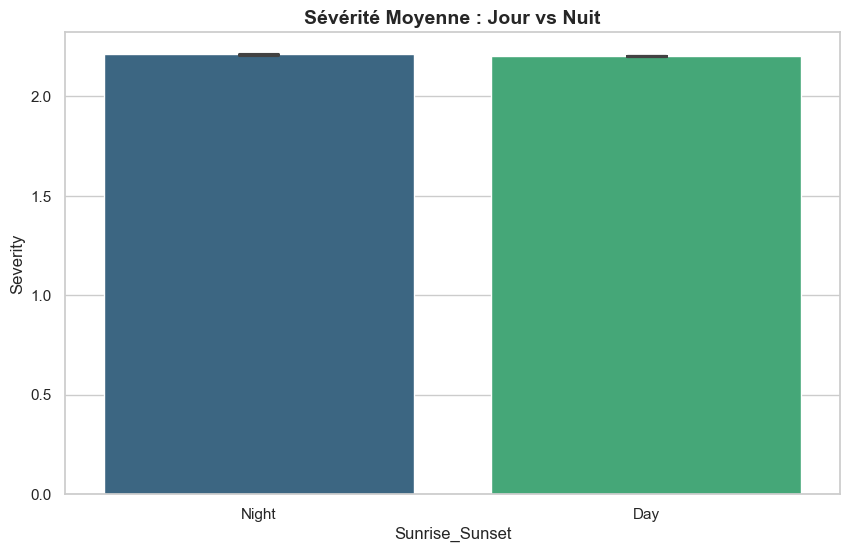

In [19]:
# Comparaison Jour vs Nuit
plt.figure(figsize=(10, 6))
sns.barplot(x='Sunrise_Sunset', y='Severity', data=sample_df, palette='viridis', capsize=.1)
plt.title("Sévérité Moyenne : Jour vs Nuit", fontsize=14, fontweight='bold')
plt.show()

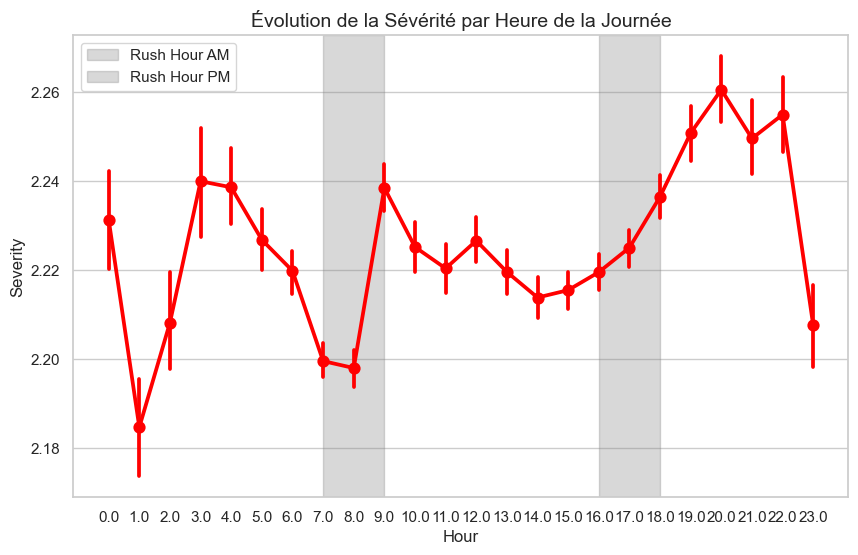

In [20]:
# Extraction de l'heure et définition des heures de pointe (7h-9h, 16h-18h)
sample_df['Hour'] = pd.to_datetime(sample_df['Start_Time']).dt.hour
sample_df['Rush_Hour'] = sample_df['Hour'].isin([7, 8, 9, 16, 17, 18])

plt.figure(figsize=(10, 6))
sns.pointplot(x='Hour', y='Severity', data=sample_df, color='red')
plt.axvspan(7, 9, color='gray', alpha=0.3, label='Rush Hour AM')
plt.axvspan(16, 18, color='gray', alpha=0.3, label='Rush Hour PM')
plt.title("Évolution de la Sévérité par Heure de la Journée", fontsize=14)
plt.legend()
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\355094521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Is_Weekend', y='Severity', data=sample_df, palette='Set2')


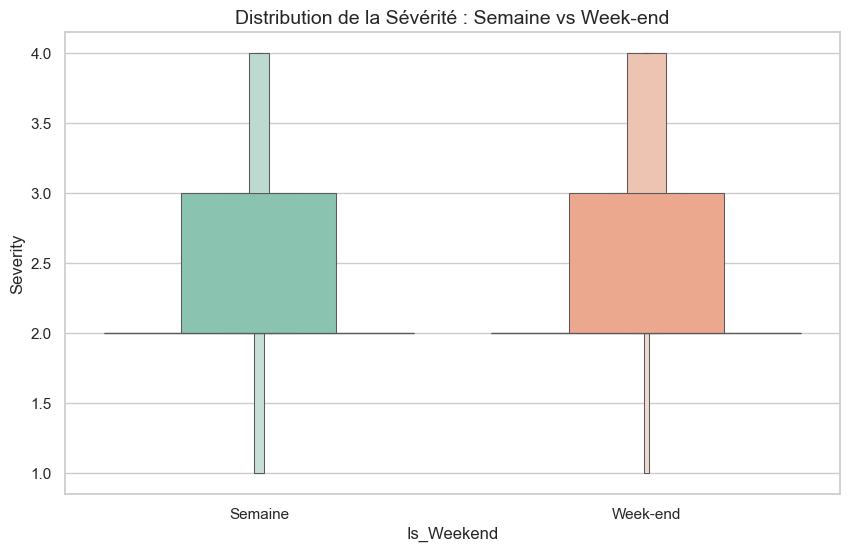

In [21]:
# Extraction du jour de la semaine (0=Lundi, 6=Dimanche)
sample_df['Day_of_Week'] = pd.to_datetime(sample_df['Start_Time']).dt.dayofweek
sample_df['Is_Weekend'] = sample_df['Day_of_Week'] >= 5

plt.figure(figsize=(10, 6))
sns.boxenplot(x='Is_Weekend', y='Severity', data=sample_df, palette='Set2')
plt.xticks([0, 1], ['Semaine', 'Week-end'])
plt.title("Distribution de la Sévérité : Semaine vs Week-end", fontsize=14)
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\3365156259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sunrise_Sunset', y='Severity', data=sample_df, palette='cool')


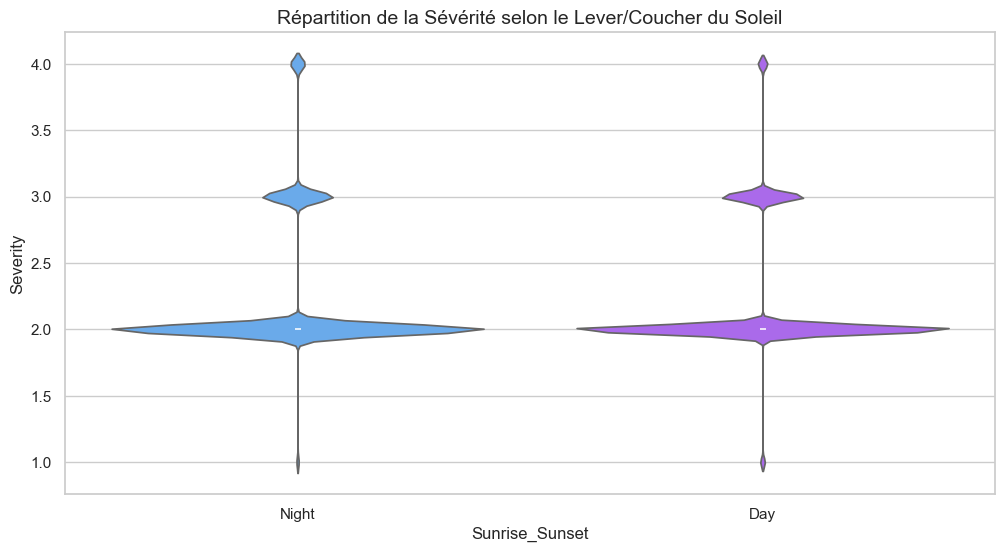

In [27]:
# Comparaison des phases de luminosité
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sunrise_Sunset', y='Severity', data=sample_df, palette='cool')
plt.title("Répartition de la Sévérité selon le Lever/Coucher du Soleil", fontsize=14)
plt.show()

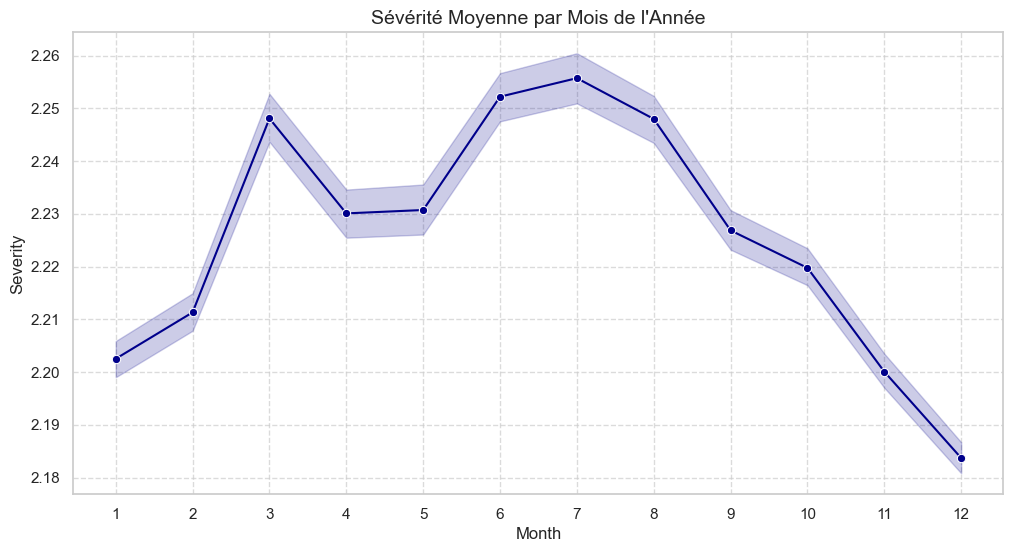

In [28]:
sample_df['Month'] = pd.to_datetime(sample_df['Start_Time']).dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Severity', data=sample_df, marker='o', color='darkblue')
plt.xticks(range(1, 13))
plt.title("Sévérité Moyenne par Mois de l'Année", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

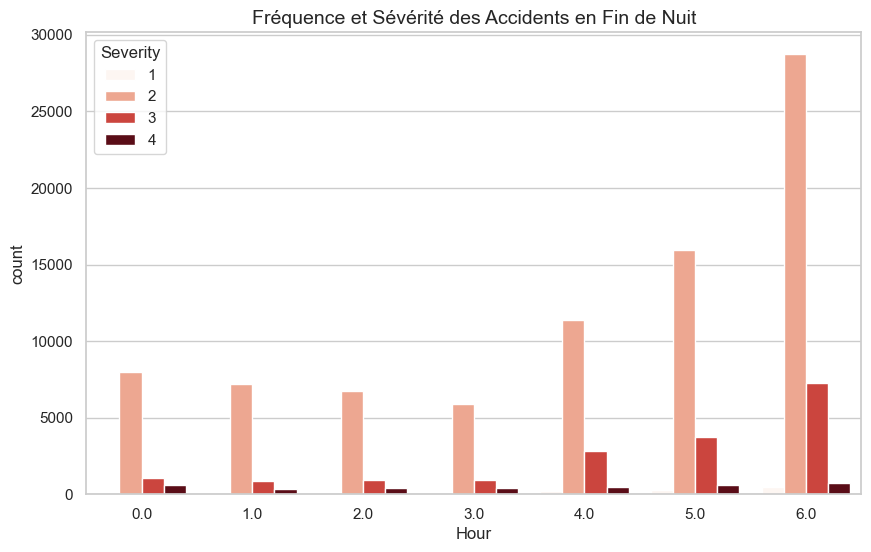

In [29]:
# Focus sur la tranche 0h - 6h
night_focus = sample_df[sample_df['Hour'] <= 6]

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Severity', data=night_focus, palette='Reds')
plt.title("Fréquence et Sévérité des Accidents en Fin de Nuit", fontsize=14)
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\3618026596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Infra_Type', y='Severity', data=df_present, palette='magma')


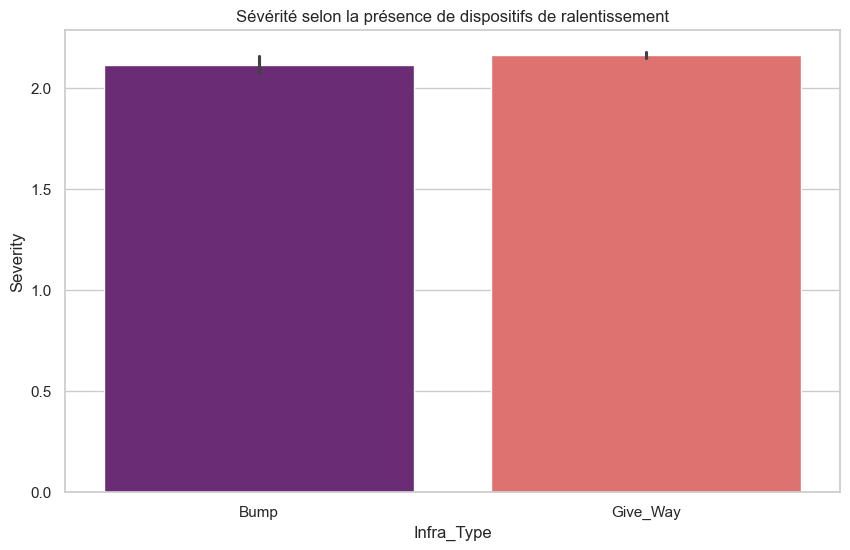

In [31]:
# Comparaison de la sévérité pour les ralentisseurs et cédez-le-passage
infra_cols = ['Bump', 'Give_Way']
df_melted = sample_df.melt(id_vars='Severity', value_vars=infra_cols, var_name='Infra_Type', value_name='Present')
df_present = df_melted[df_melted['Present'] == True]

plt.figure(figsize=(10, 6))
sns.barplot(x='Infra_Type', y='Severity', data=df_present, palette='magma')
plt.title("Sévérité selon la présence de dispositifs de ralentissement")
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\1711265336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Amenity', y='Severity', data=sample_df, palette='Blues')


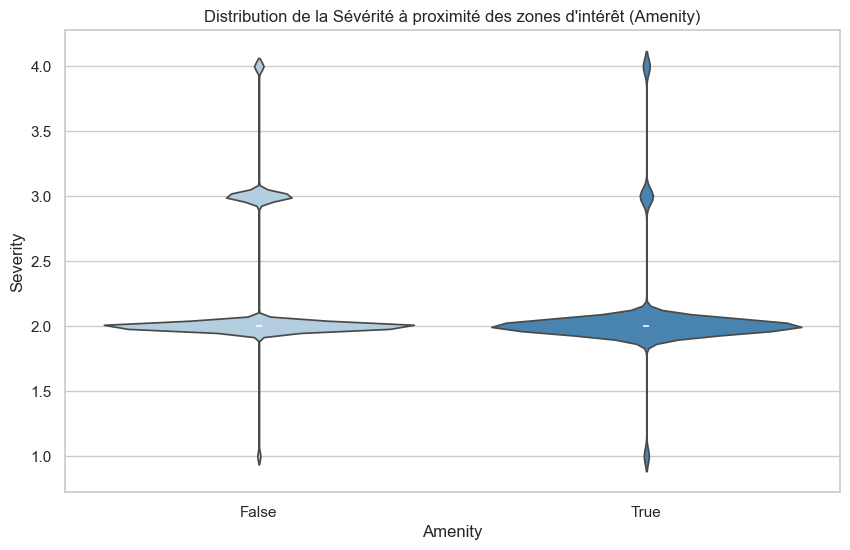

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Amenity', y='Severity', data=sample_df, palette='Blues')
plt.title("Distribution de la Sévérité à proximité des zones d'intérêt (Amenity)")
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\727204594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Junction', y='Severity', data=sample_df, palette='Oranges')


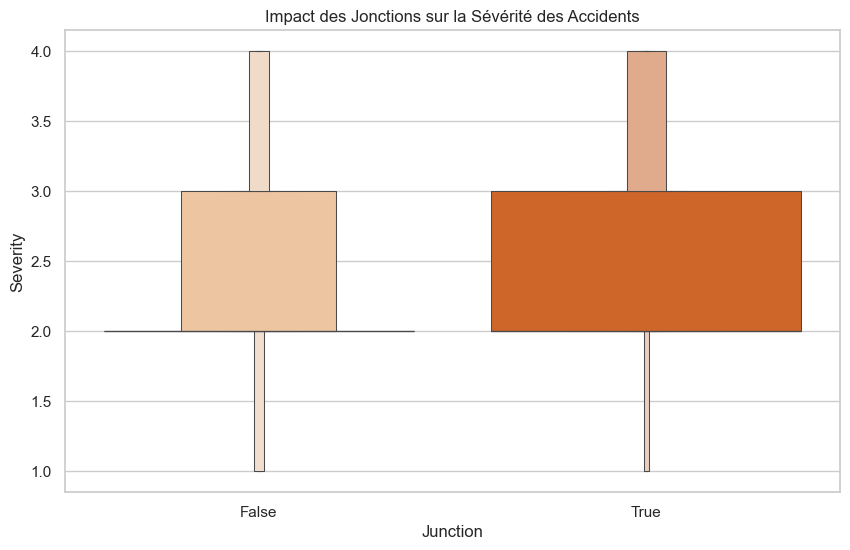

In [33]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Junction', y='Severity', data=sample_df, palette='Oranges')
plt.title("Impact des Jonctions sur la Sévérité des Accidents")
plt.show()

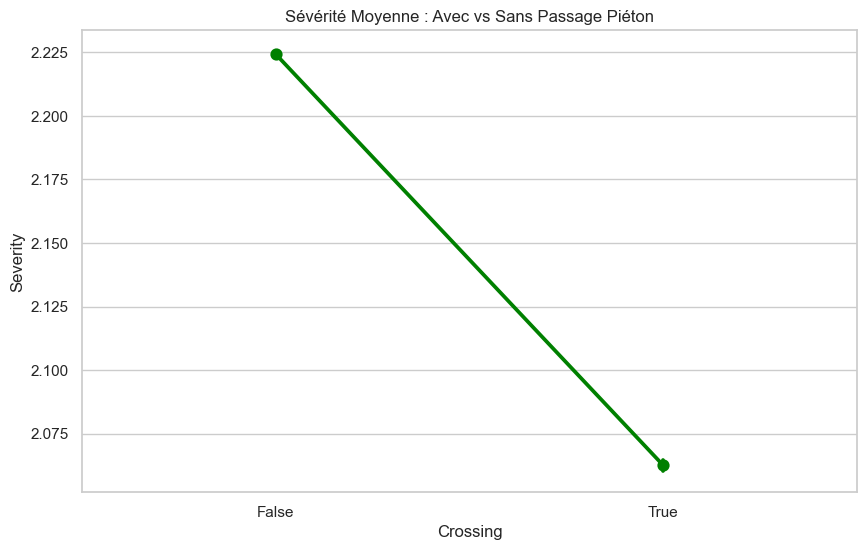

In [34]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Crossing', y='Severity', data=sample_df, color='green')
plt.title("Sévérité Moyenne : Avec vs Sans Passage Piéton")
plt.show()

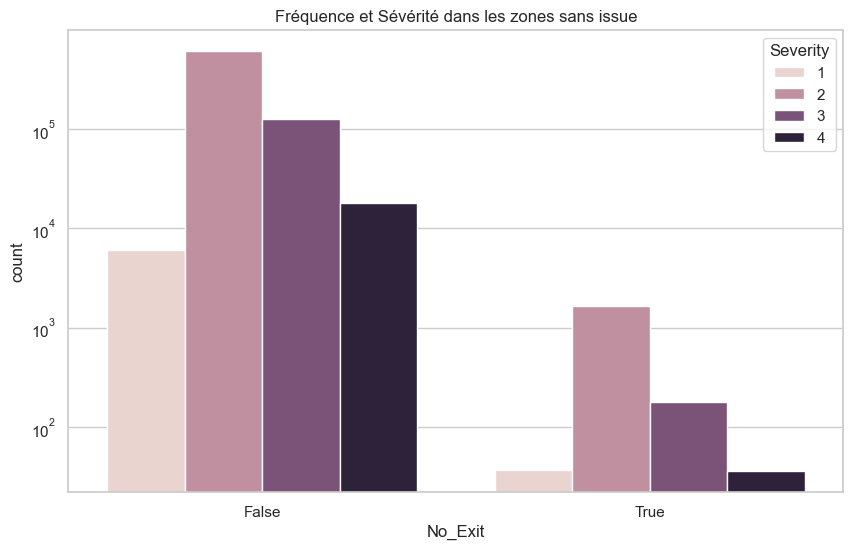

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='No_Exit', hue='Severity', data=sample_df)
plt.yscale('log') # Pour mieux voir les petits volumes
plt.title("Fréquence et Sévérité dans les zones sans issue")
plt.show()

C:\Users\imane\AppData\Local\Temp\ipykernel_7064\1065315180.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Control_Type', y='Severity', data=traffic_features, palette='Set3')


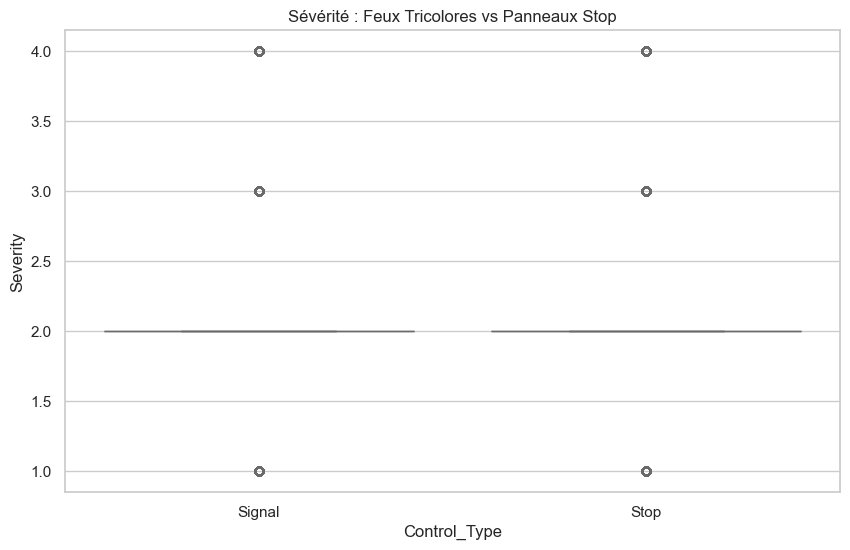

In [36]:
# Comparaison directe Traffic_Signal vs Stop
traffic_features = sample_df[(sample_df['Traffic_Signal'] == True) | (sample_df['Stop'] == True)].copy()
traffic_features['Control_Type'] = np.where(traffic_features['Traffic_Signal'], 'Signal', 'Stop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Control_Type', y='Severity', data=traffic_features, palette='Set3')
plt.title("Sévérité : Feux Tricolores vs Panneaux Stop")
plt.show()

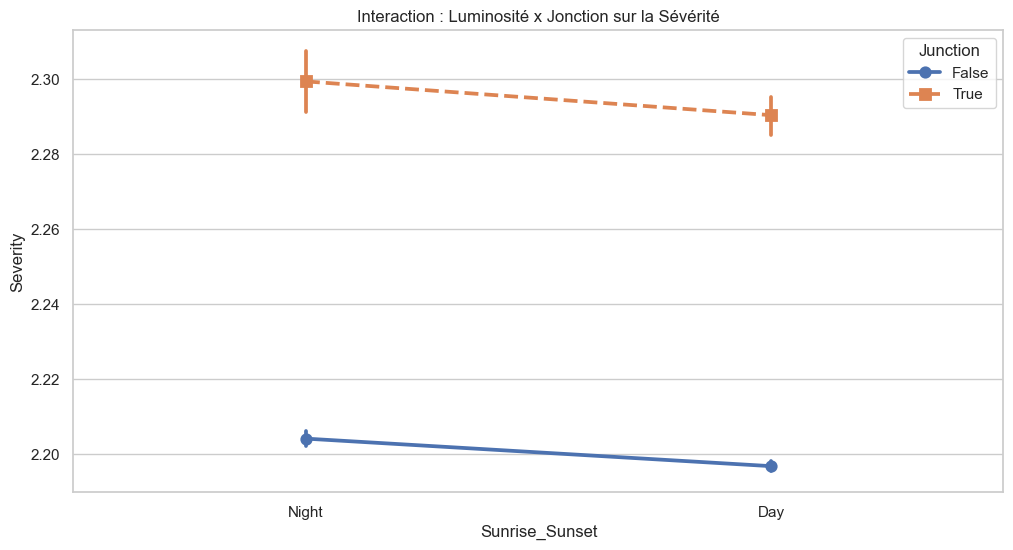

In [37]:
# Interaction entre Jonction et Luminosité
plt.figure(figsize=(12, 6))
sns.pointplot(x='Sunrise_Sunset', y='Severity', hue='Junction', data=sample_df, markers=["o", "s"], linestyles=["-", "--"])
plt.title("Interaction : Luminosité x Jonction sur la Sévérité")
plt.show()

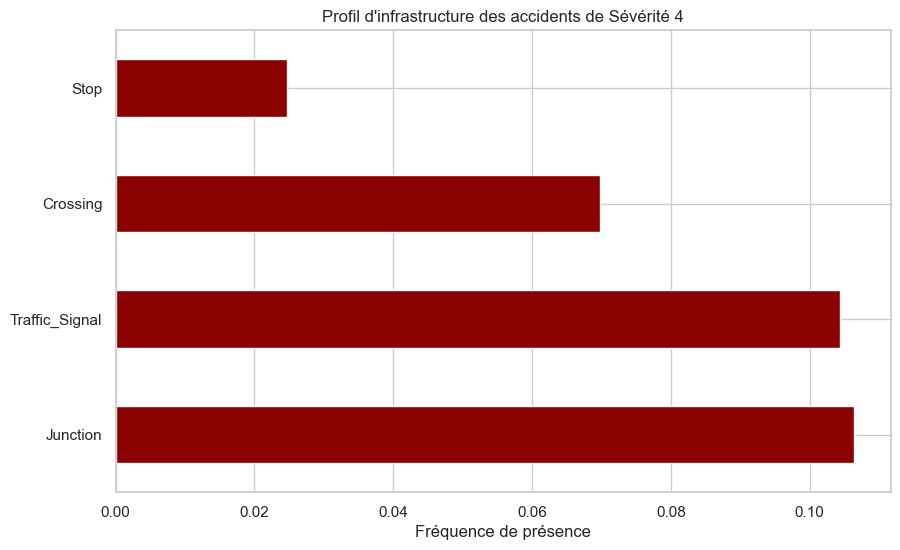

In [38]:
# Comparaison des moyennes d'infrastructure pour la sévérité maximale
high_severity = sample_df[sample_df['Severity'] == 4]
infra_stats = high_severity[['Junction', 'Traffic_Signal', 'Crossing', 'Stop']].mean()

plt.figure(figsize=(10, 6))
infra_stats.plot(kind='barh', color='darkred')
plt.title("Profil d'infrastructure des accidents de Sévérité 4")
plt.xlabel("Fréquence de présence")
plt.show()

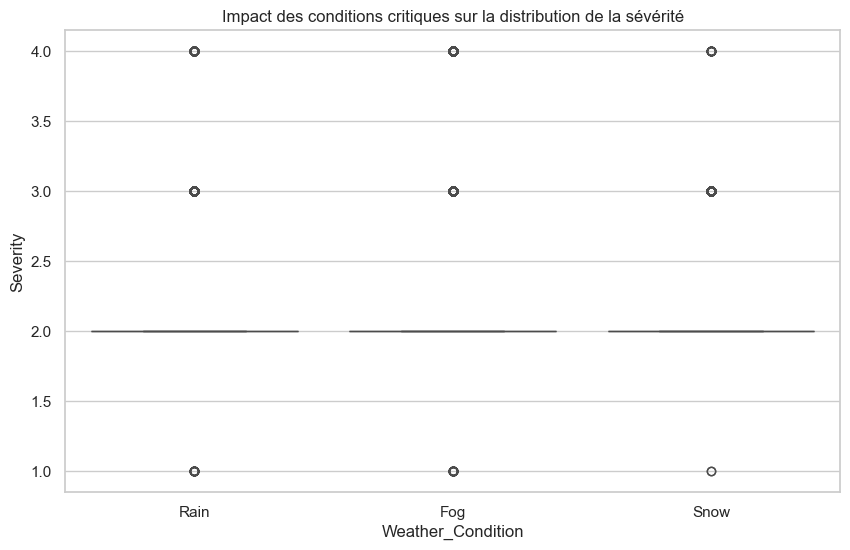

In [39]:
# Analyse de la sévérité par météo dégradée
bad_weather = sample_df[sample_df['Weather_Condition'].isin(['Rain', 'Snow', 'Fog'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=bad_weather)
plt.title("Impact des conditions critiques sur la distribution de la sévérité")
plt.show()

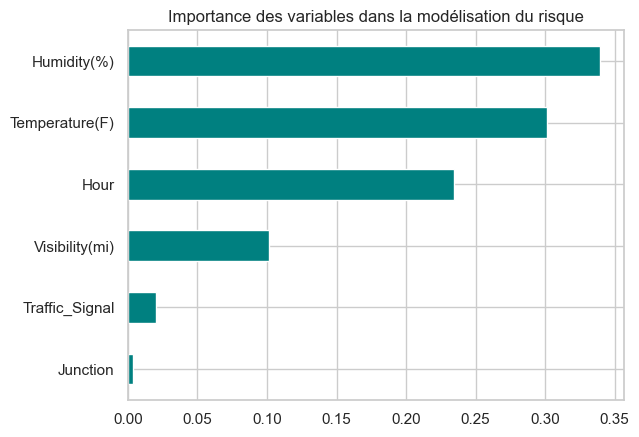

In [40]:
# Importance des variables (conceptuel)
from sklearn.ensemble import RandomForestRegressor

# Sélection de variables numériques et booléennes
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Junction', 'Traffic_Signal', 'Hour']
X = sample_df[features].fillna(0)
y = sample_df['Severity']

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Importance des variables dans la modélisation du risque")
plt.show()